This project analyzes aviation accident data (2013–2023) from the National Transportation Safety Board (NTSB) to help the YinYan company make data-driven decisions on purchasing aircraft for both commercial airline operations and private charter/training services.

The analysis evaluates safety, fatality rates, and operational risks of different aircraft models to recommend the best options for the company’s entry into the aviation industry.

In order to access the file, we have to import Pandas.

In [1]:
import pandas as pd
import numpy as np
from numbers import Number

Assigning dataframe the variable 'df'

In [2]:
df = pd.read_csv("Aviation_Data.csv", low_memory=False)

'low_memory' helps pandas read the whole file into memory at once.

In [3]:
print(df.columns[[6, 7, 28]])

Index(['Latitude', 'Longitude', 'Broad.phase.of.flight'], dtype='object')


Shows a list of the columns in the dataset at 6,7,28

In [4]:
df.head(20)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


Displays the first 20 rows of the dataset

In [5]:
df.tail(20)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90328,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
90329,20221215106461,Accident,ERA23LA089,2022-12-13,"Rockingham, NC",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,20-12-2022
90330,20221220106480,Accident,WPR23LA072,2022-12-13,"Liberal, KS",United States,NaN,NaN,NaN,NaN,...,NaN,Sierra Bravo Partnership,0.0,0.0,0.0,0.0,NaN,NaN,NaN,20-12-2022
90331,20221214106459,Accident,GAA23WA042,2022-12-14,"Happy Valley-Goose Bay, OF",Canada,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,2.0,0.0,NaN,NaN,NaN,20-12-2022
90332,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90333,20221215106462,Accident,CEN23LA064,2022-12-15,"Patterson, LA",United States,NaN,NaN,NaN,NaN,...,NaN,ROTORCRAFT LEASING CO LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90334,20221219106474,Accident,ANC23LA009,2022-12-15,"Lihue, HI",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,NaN,22-12-2022
90335,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
90336,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022
90337,20221227106496,Accident,WPR23LA074,2022-12-17,"Cottonwood, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,27-12-2022


Displays the last 20 rows of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Summary of the dataset

In [7]:
df.shape

(90348, 31)

Gives the dimensions of the dataset as a tuple

In [8]:
columns_needed = [
    "Event.Date", "Location", "Make", "Model", "Engine.Type", "Aircraft.Category",
    "Purpose.of.flight", "Injury.Severity","Total.Fatal.Injuries", "Broad.phase.of.flight",
    "Weather.Condition"
]
df = df[columns_needed]


Separates the dataset into the list of columns that are important for the research.

In [9]:
df.shape

(90348, 11)

In [10]:
df.columns = df.columns.str.lower().str.replace(".", "_")

Replace all column names to lowercase and replace the periods with underscore. 'df.columns' returns the intended dataset

In [11]:
df = df[df["event_date"] >= "2013-01-01"]

Requesting for dataset over the last 10 years between 2013-2023.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15829 entries, 73173 to 90347
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_date             15829 non-null  object 
 1   location               15829 non-null  object 
 2   make                   15824 non-null  object 
 3   model                  15823 non-null  object 
 4   engine_type            11182 non-null  object 
 5   aircraft_category      15580 non-null  object 
 6   purpose_of_flight      12522 non-null  object 
 7   injury_severity        15032 non-null  object 
 8   total_fatal_injuries   15829 non-null  float64
 9   broad_phase_of_flight  0 non-null      object 
 10  weather_condition      12650 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [13]:
df["weather_condition"] = df["weather_condition"].fillna("Unknown")
df["broad_phase_of_flight"] = df["broad_phase_of_flight"].fillna("Unknown")

This code replaces all missing values marked (NAN) with Unknown.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15829 entries, 73173 to 90347
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   event_date             15829 non-null  object 
 1   location               15829 non-null  object 
 2   make                   15824 non-null  object 
 3   model                  15823 non-null  object 
 4   engine_type            11182 non-null  object 
 5   aircraft_category      15580 non-null  object 
 6   purpose_of_flight      12522 non-null  object 
 7   injury_severity        15032 non-null  object 
 8   total_fatal_injuries   15829 non-null  float64
 9   broad_phase_of_flight  15829 non-null  object 
 10  weather_condition      15829 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB


In [15]:
df.head(20)

,event_date,location,make,model,engine_type,aircraft_category,purpose_of_flight,injury_severity,total_fatal_injuries,broad_phase_of_flight,weather_condition
73173,2013-01-01,"Chiloquin, OR",CESSNA,182P,Reciprocating,Airplane,Instructional,Non-Fatal,0.0,Unknown,VMC
73174,2013-01-02,"North Las Vegas, NV",PIPER,PA-60-602P,Reciprocating,Airplane,Instructional,Non-Fatal,0.0,Unknown,VMC
73175,2013-01-02,"Delano, CA",BELL,206,Turbo Shaft,Helicopter,Other Work Use,Fatal,1.0,Unknown,VMC
73176,2013-01-02,"Jasper, AL",PIPER,PA-30,Reciprocating,Airplane,Personal,Fatal,3.0,Unknown,IMC
73177,2013-01-02,"Seminole, OK",EUROCOPTER,EC130 B4,Turbo Shaft,Helicopter,Positioning,Non-Fatal,0.0,Unknown,VMC
73178,2013-01-02,"Tampa, FL",ROBINSON HELICOPTER,R22 BETA,Reciprocating,Helicopter,Instructional,Non-Fatal,0.0,Unknown,VMC
73179,2013-01-02,"Menard, TX",ROBINSON HELICOPTER COMPANY,R44 II,Reciprocating,Helicopter,Personal,Non-Fatal,0.0,Unknown,VMC
73180,2013-01-02,"Elkhart, IN",LUSCOMBE,8,Reciprocating,Airplane,Personal,Non-Fatal,0.0,Unknown,VMC
73181,2013-01-03,"Oceano, CA",LUSCOMBE,8A,Reciprocating,Airplane,Personal,Fatal,1.0,Unknown,VMC
73183,2013-01-03,"Clear Lake, IA",BELL HELICOPTER,407,Turbo Shaft,Helicopter,Positioning,Fatal,3.0,Unknown,VMC


Now to check on the changes made to our dataset.

In [16]:
df.tail(20)

,event_date,location,make,model,engine_type,aircraft_category,purpose_of_flight,injury_severity,total_fatal_injuries,broad_phase_of_flight,weather_condition
90328,2022-12-13,"Lewistown, MT",PIPER,PA42,NaN,Airplane,NaN,Non-Fatal,0.0,Unknown,Unknown
90329,2022-12-13,"Rockingham, NC",PIPER,PA-38-112,NaN,NaN,NaN,Non-Fatal,0.0,Unknown,Unknown
90330,2022-12-13,"Liberal, KS",CESSNA,441,NaN,NaN,NaN,Non-Fatal,0.0,Unknown,Unknown
90331,2022-12-14,"Happy Valley-Goose Bay, OF",PIPER,PA 46-350P,NaN,NaN,NaN,Serious,0.0,Unknown,Unknown
90332,2022-12-14,"San Juan, PR",CIRRUS DESIGN CORP,SR22,NaN,Airplane,Personal,Non-Fatal,0.0,Unknown,VMC
90333,2022-12-15,"Patterson, LA",BELL,206-L4,NaN,NaN,NaN,NaN,0.0,Unknown,Unknown
90334,2022-12-15,"Lihue, HI",BEECH,77,NaN,NaN,NaN,Serious,0.0,Unknown,Unknown
90335,2022-12-15,"Wichita, KS",SWEARINGEN,SA226TC,NaN,Airplane,NaN,Non-Fatal,0.0,Unknown,Unknown
90336,2022-12-16,"Brooksville, FL",CESSNA,R172K,NaN,Airplane,Personal,Minor,0.0,Unknown,VMC
90337,2022-12-17,"Cottonwood, CA",ROYSE RALPH L,GLASAIR,NaN,NaN,Personal,Minor,0.0,Unknown,Unknown


In [17]:
df = df.dropna(subset=["broad_phase_of_flight"])


This Column has proved unreliable as it doesnt return any information- So we drop it from our dataset.

In [18]:
df["fatal"] = df["injury_severity"].apply(lambda x: 1 if "Fatal" in str(x) else 0)


If the word 'fatal' appears it is assigned the value- (1) and if not (0)

In [19]:
risk_summary = df.groupby(["make", "model"]).agg(
    total_accidents=("model", "count"),
    fatal_accidents=("fatal", "sum")
).reset_index()


Groups the dataset by aircraft manufacturer and aircraft model. The agg() function calculates summary statistics for each group.


In [20]:
risk_summary["fatal_rate"] = (
    risk_summary["fatal_accidents"] / risk_summary["total_accidents"]
).round(2)
risk_summary


,make,model,total_accidents,fatal_accidents,fatal_rate
0,177MF LLC,PITTS MODEL 12,1,1,1.0
1,2021FX3 LLC,CCX-2000,2,2,1.0
2,3XTRIM,450 ULTRA,1,1,1.0
3,5 RIVERS LLC,SQ-2,1,0,0.0
4,737,800,2,2,1.0
...,...,...,...,...,...
5524,Zidek,Vans RV-4,1,1,1.0
5525,Zlin,Z143,1,1,1.0
5526,Zlin Aviation,Savage Cub-S,1,1,1.0
5527,Zodiac,601XL,1,1,1.0


Divides fatal accidents by total accidents for each aircraft model. To give a proportion of accidents that were fatal.

In [21]:
risk_summary = risk_summary[risk_summary["total_accidents"] >= 30] \
    .sort_values(by="fatal_rate", ascending=True)

print(risk_summary.head(10))

          make model  total_accidents  fatal_accidents  fatal_rate
218     AIRBUS  A320               61               15        0.25
954     BOEING   737              335              141        0.42
1054    BOEING   777               58               27        0.47
1007    BOEING   747               36               18        0.50
1316    Boeing   737               31               19        0.61
4485  ROBINSON   R44              105               91        0.87
4090     PIPER  PA25               31               27        0.87
3595    MOONEY  M20J               39               34        0.87
823       BELL   407               42               37        0.88
4478  ROBINSON   R22               37               33        0.89


Now we have the risk summary of of the different airplanes by the fatal rate of accidents that have happened more than 30 times.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df["event_date"] = pd.to_datetime(df["event_date"])

df["year"] = df["event_date"].dt.year
df.year

73173    2013
73174    2013
73175    2013
73176    2013
73177    2013
         ... 
90343    2022
90344    2022
90345    2022
90346    2022
90347    2022
Name: year, Length: 15829, dtype: int32

Converts event_date to a proper datetime format. It also allows filtering by specific year.

In [24]:
risk_summary = risk_summary.dropna(subset=["fatal_rate"])

Removes the rows where fatal_rate is NaN.

In [25]:
yearly_trend = (
    df.groupby(["year", "purpose_of_flight"])
      .size()
      .reset_index(name="accidents")
)
yearly_trend

,year,purpose_of_flight,accidents
0,2013,Aerial Application,71
1,2013,Aerial Observation,26
2,2013,Air Drop,1
3,2013,Air Race show,9
4,2013,Banner Tow,7
...,...,...,...
205,2022,Positioning,25
206,2022,Public Aircraft,2
207,2022,Public Aircraft - Federal,5
208,2022,Skydiving,5


Groups the dataset by year and purpose_of_flight. then size returns the number of accidents in each row.

Now we visualize the above data using the line graph below.

In [26]:
yearly_trend = yearly_trend.replace([np.inf, -np.inf], np.nan).dropna()
yearly_trend

,year,purpose_of_flight,accidents
0,2013,Aerial Application,71
1,2013,Aerial Observation,26
2,2013,Air Drop,1
3,2013,Air Race show,9
4,2013,Banner Tow,7
...,...,...,...
205,2022,Positioning,25
206,2022,Public Aircraft,2
207,2022,Public Aircraft - Federal,5
208,2022,Skydiving,5


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


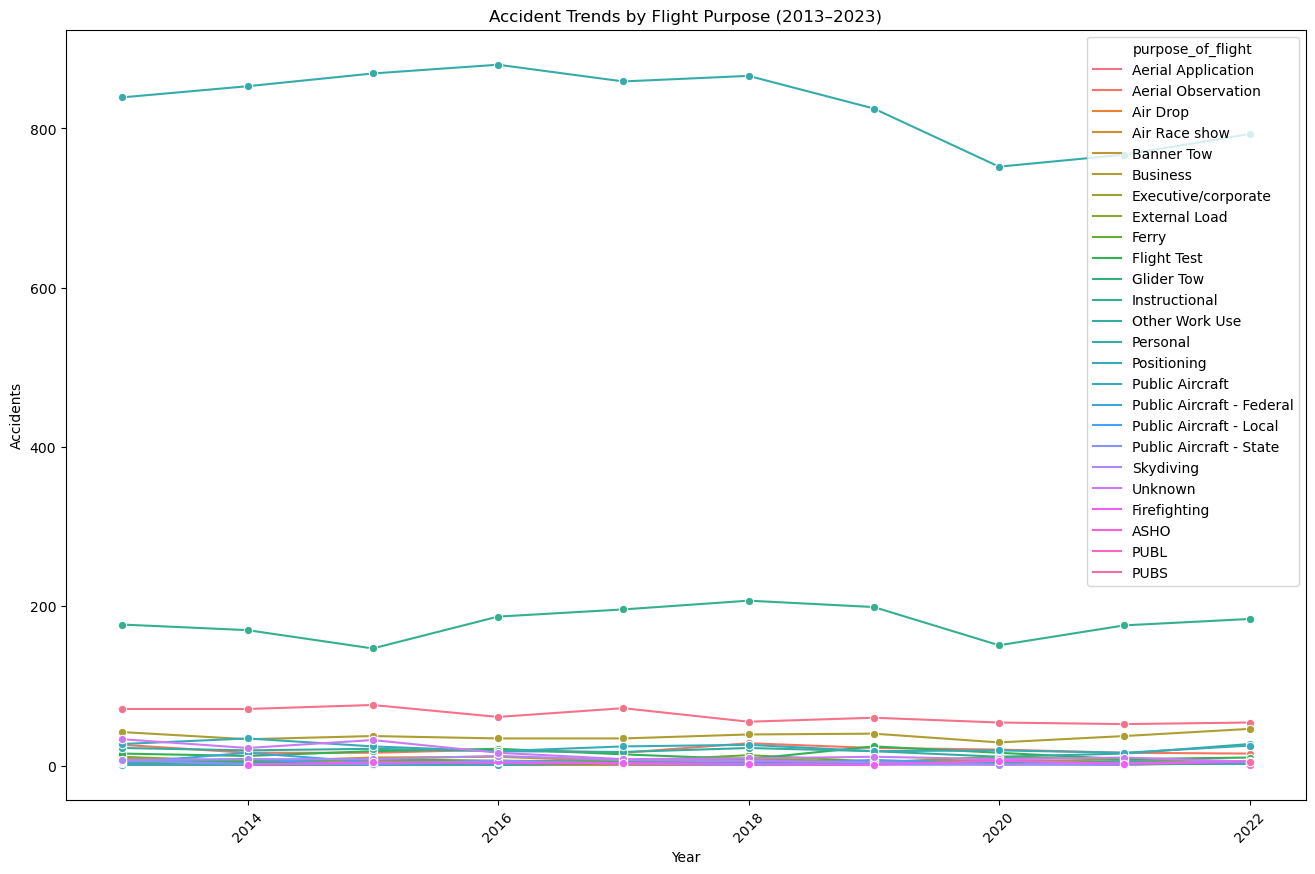

In [27]:
plt.figure(figsize=(16,10))
sns.lineplot(data=yearly_trend, x="year", y="accidents", hue="purpose_of_flight", marker="o")

plt.title("Accident Trends by Flight Purpose (2013–2023)")
plt.xlabel("Year")
plt.ylabel("Accidents")
plt.xticks(rotation=45)
plt.show()

Below we use a bar chart to visualize the top 15 safest flights by fatal accident rates.

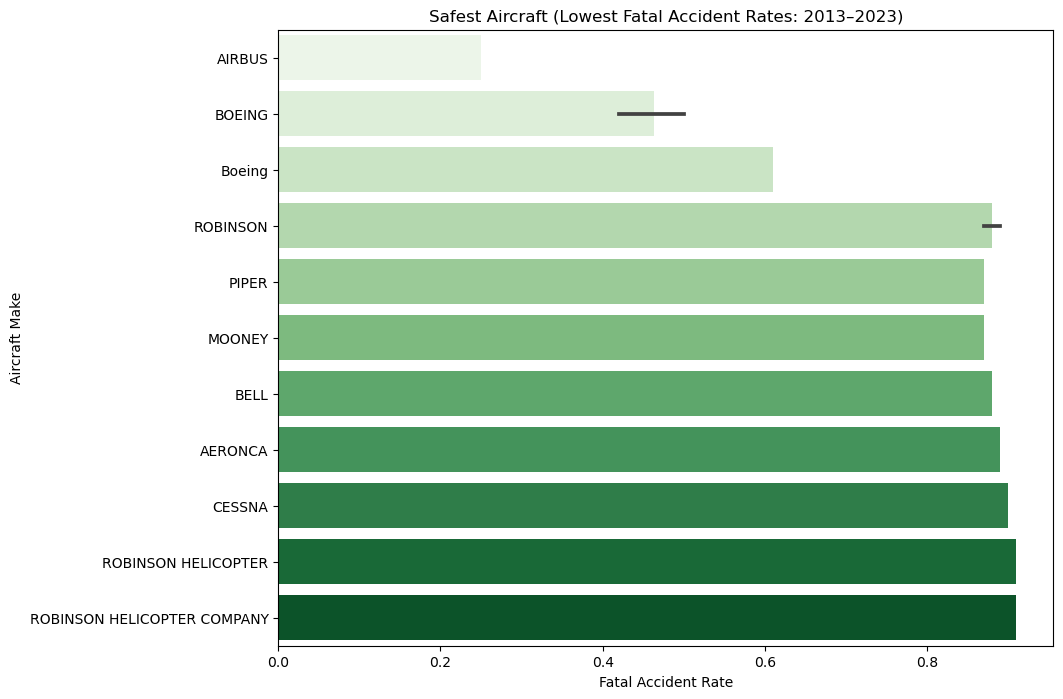

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(data=risk_summary.head(15), x="fatal_rate", y="make", palette="Greens")

plt.title("Safest Aircraft (Lowest Fatal Accident Rates: 2013–2023)")
plt.xlabel("Fatal Accident Rate")
plt.ylabel("Aircraft Make")
plt.show()

In [29]:
phase_risk = df.groupby("broad_phase_of_flight").size().sort_values(ascending=False)

The code above quickly identifies which flight phase has the most accidents.

Below we visualize it using a barplot.

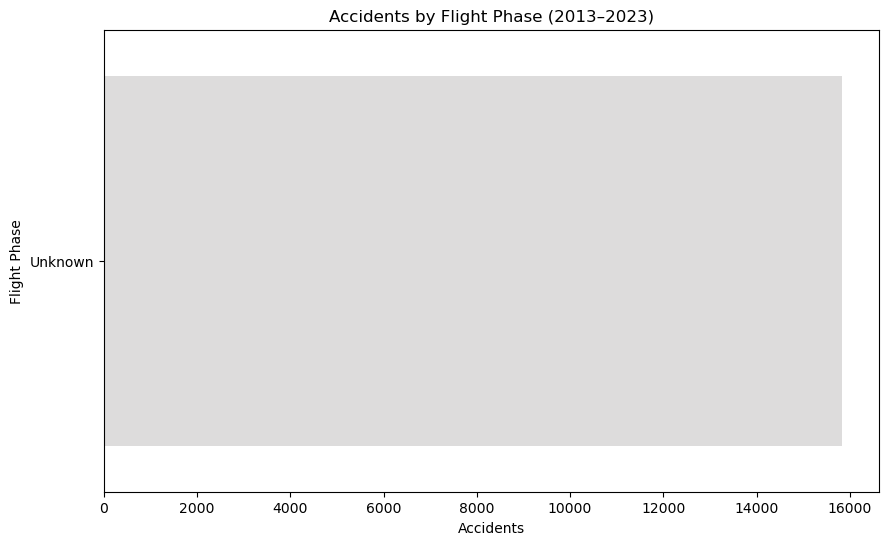

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=phase_risk.values, y=phase_risk.index, palette="coolwarm")

plt.title("Accidents by Flight Phase (2013–2023)")
plt.xlabel("Accidents")
plt.ylabel("Flight Phase")
plt.show()

In [31]:
weather_risk = df["weather_condition"].value_counts()
weather_risk

weather_condition
VMC        11857
Unknown     3179
IMC          546
Unk          247
Name: count, dtype: int64

The code above selects the weather_condition column from the DataFrame and Counts how many times each unique weather condition appears in the dataset.

In [32]:
df["weather_condition"] = df["weather_condition"].astype(str)
df["weather_condition"] = df["weather_condition"].replace({"Unk": "Unknown"})

In [33]:
print(df["weather_condition"].unique())

['VMC' 'IMC' 'Unknown']


In [34]:
weather_risk = df["weather_condition"].value_counts()
weather_risk

weather_condition
VMC        11857
Unknown     3426
IMC          546
Name: count, dtype: int64

Using a barplot to visualize the data.

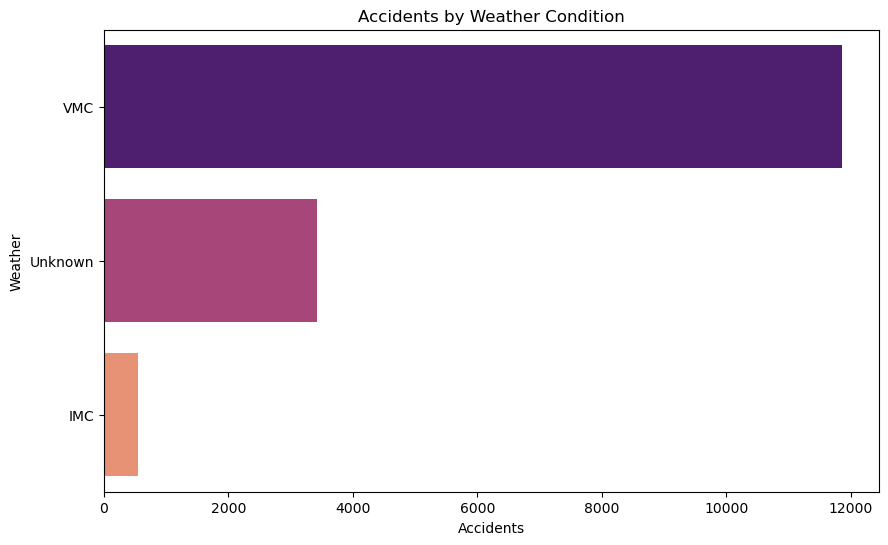

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x=weather_risk.values, y=weather_risk.index, palette="magma")

plt.title("Accidents by Weather Condition")
plt.xlabel("Accidents")
plt.ylabel("Weather")
plt.show()

In [ ]:
From the above visualization most accidents occured when there was use of visual meteorological conditions, therefore weather did not have a big effect during the accidents.

Based on the data analysis above, it is indicative that the Airbus A320 and Boeing 737 are the safest and most reliable options for commercial operations, making them suitable for a new company entering the market. 
For private charters and pilot training, the Piper PA-25 is ideal due to its lower cost and smaller size, making it a practical first purchase. 


